In [32]:

# multivariate output multi-step 1d cnn example
import numpy as np
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf
from keras.layers import Input, TimeDistributed, Conv2D, Flatten, Dense, Dropout, BatchNormalization, Activation, Reshape,GRU, LeakyReLU, Reshape,Permute,ConvLSTM2D,ConvLSTM1D,Conv1D	,UpSampling2D,Conv2DTranspose,ZeroPadding2D,UpSampling1D,Cropping1D,Lambda,LSTM,RepeatVector
from keras.models import Model
import matplotlib.pyplot as plt

In [33]:
import pandas as pd

In [34]:
data = pd.read_excel('data.xlsx', sheet_name="Çorum", index_col=0)
data.head()

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
2004,247,22886.5000,12982.77,410.8500,9.3,6.7,0.4,-2.1,-4.6,-3.6,...,74.2,30.7,16.1,69.4,75.6,22.0,20.1,55.2,55.5,87.2
2005,252,22202.7300,13583.24,447.4600,7.0,5.5,-0.8,-3.5,-3.0,-3.7,...,3.2,13.1,46.3,10.1,23.3,14.8,91.0,56.9,38.8,21.8
2006,206,23399.1500,13176.08,587.4900,9.0,4.1,0.2,-2.7,-7.1,-5.9,...,21.8,36.7,50.3,12.9,40.0,60.3,57.4,17.5,54.0,36.1
2007,157,20571.7500,9902.17,558.0200,10.2,7.3,-1.2,-6.8,-3.9,-4.9,...,84.0,31.4,24.1,6.0,21.8,18.4,42.3,28.2,41.7,105.8
2008,215,16644.6101,6428.13,1034.2342,9.5,6.0,0.9,-2.6,-11.0,-8.0,...,6.8,28.8,60.3,34.5,22.5,10.2,44.0,33.2,55.2,46.2


In [35]:
from sklearn.preprocessing import MinMaxScaler

def normalize(column):
    scaler = MinMaxScaler()
    data = column.to_numpy()
    data = data.reshape(-1, 1)
    scaler.fit(data)
    return scaler.transform(data)

In [36]:
for name, column in data.iteritems():
    data[name] = normalize(column)

C:\Users\Cevher\AppData\Local\Temp\ipykernel_10732\2452207798.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in data.iteritems():


In [37]:
data.head()

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
2004,0.573248,0.410289,0.916078,0.000000,0.250000,0.504587,0.474359,0.606383,0.556522,0.523364,...,0.841924,0.281581,0.172312,0.670987,0.733970,0.275466,0.162928,0.490269,0.310506,0.528698
2005,0.605096,0.365344,1.000000,0.040306,0.000000,0.394495,0.320513,0.457447,0.695652,0.514019,...,0.028637,0.111861,0.617084,0.079761,0.020464,0.172166,1.000000,0.506024,0.180545,0.000000
2006,0.312102,0.443987,0.943095,0.194474,0.217391,0.266055,0.448718,0.542553,0.339130,0.308411,...,0.241695,0.339441,0.675994,0.107677,0.248295,0.824964,0.603306,0.140871,0.298833,0.115602
2007,0.000000,0.258137,0.485533,0.162028,0.347826,0.559633,0.269231,0.106383,0.617391,0.401869,...,0.954181,0.288332,0.290133,0.038883,0.000000,0.223816,0.425030,0.240037,0.203113,0.679062
2008,0.369427,0.000000,0.000000,0.686321,0.271739,0.440367,0.538462,0.553191,0.000000,0.112150,...,0.069874,0.263259,0.823270,0.323031,0.009550,0.106169,0.445100,0.286376,0.308171,0.197251


In [38]:
train = data[:16]
test = data[16:]

In [39]:
y_train = train['Yield'].to_numpy()
X_train = train.drop(columns=['Yield']).to_numpy()

y_test = test['Yield'].to_numpy()
X_test = test.drop(columns=['Yield']).to_numpy()

In [40]:
X_train.shape

(16, 43)

In [41]:
X_test.shape

(3, 43)

In [42]:
X_train = X_train.reshape((16, 1, 43))
X_test = X_test.reshape((3,1,43))

In [43]:
X_train.shape

(16, 1, 43)

In [44]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, 43)))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=1000, verbose=0)


In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1, 64)             2816      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 50)                3250      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,117
Trainable params: 6,117
Non-trainable params: 0
____________________________________________________

In [46]:
# demonstrate prediction
# Xtest = Xtest.reshape((1, n_steps_in, n_features))
yhat = model.predict(X_test, verbose=0)
print(yhat)

[[0.59615004]
 [0.45758036]
 [0.78821313]]


In [47]:

# Ytest = Ytest.reshape(179,40)
# Ytest = Ytest.reshape(179,20)


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test,yhat)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE", (mse)**0.5)

MAE:  0.19638025007683257
MSE:  0.05203485884356201
RMSE 0.22811150528538013


In [49]:
def rmse(y, t):
    return np.sqrt(np.mean((t-y)**2))
print(rmse(y_test, yhat))

0.3837443483148538


LSTM but data might require preprocessing

In [50]:
...
# design network
model2 = Sequential()
model2.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(Dense(1))
model2.compile(loss='mae', optimizer='adam')
# fit network
history = model2.fit(X_train, y_train, epochs=1000, verbose=2, shuffle=False);
# plot history


Epoch 1/1000
1/1 - 2s - loss: 0.6118 - 2s/epoch - 2s/step
Epoch 2/1000
1/1 - 0s - loss: 0.5591 - 5ms/epoch - 5ms/step
Epoch 3/1000
1/1 - 0s - loss: 0.5065 - 6ms/epoch - 6ms/step
Epoch 4/1000
1/1 - 0s - loss: 0.4538 - 5ms/epoch - 5ms/step
Epoch 5/1000
1/1 - 0s - loss: 0.4011 - 5ms/epoch - 5ms/step
Epoch 6/1000
1/1 - 0s - loss: 0.3514 - 7ms/epoch - 7ms/step
Epoch 7/1000
1/1 - 0s - loss: 0.3074 - 5ms/epoch - 5ms/step
Epoch 8/1000
1/1 - 0s - loss: 0.2691 - 7ms/epoch - 7ms/step
Epoch 9/1000
1/1 - 0s - loss: 0.2364 - 7ms/epoch - 7ms/step
Epoch 10/1000
1/1 - 0s - loss: 0.2056 - 7ms/epoch - 7ms/step
Epoch 11/1000
1/1 - 0s - loss: 0.1885 - 7ms/epoch - 7ms/step
Epoch 12/1000
1/1 - 0s - loss: 0.1868 - 9ms/epoch - 9ms/step
Epoch 13/1000
1/1 - 0s - loss: 0.1910 - 6ms/epoch - 6ms/step
Epoch 14/1000
1/1 - 0s - loss: 0.1972 - 9ms/epoch - 9ms/step
Epoch 15/1000
1/1 - 0s - loss: 0.2098 - 5ms/epoch - 5ms/step
Epoch 16/1000
1/1 - 0s - loss: 0.2199 - 5ms/epoch - 5ms/step
Epoch 17/1000
1/1 - 0s - loss: 0.22

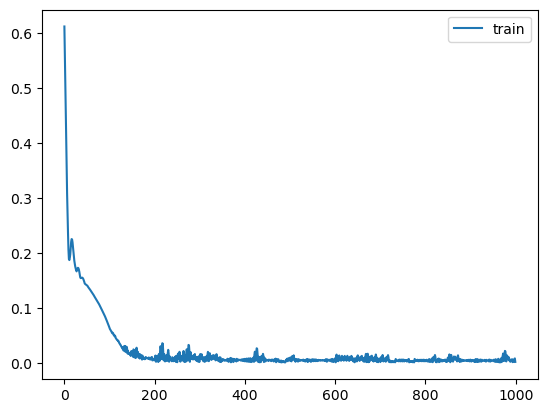

In [51]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [52]:
# make a prediction
yhatlstm = model2.predict(X_test)


1/1 [==============================] - 1s 691ms/step


In [53]:
yhatlstm.shape

(3, 1)

In [54]:

mae = mean_absolute_error(y_test,yhatlstm)
print("MSE: ", mse)
print("MAE: ", mae)

MSE:  0.05203485884356201
MAE:  0.22400947297960835


In [55]:
mae = mean_absolute_error(y_test,yhatlstm)
mse = mean_squared_error(y_test, yhatlstm)
def rmse(y, t):
    return np.sqrt(np.mean((t-y)**2))
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE", (mse)**0.5)

MAE:  0.22400947297960835
MSE:  0.1036563285818745
RMSE 0.3219570290921981


In [56]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor


In [57]:
mdl = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=6)

In [58]:
nsamples, nx, ny = X_train.shape
Xt = X_train.reshape((nsamples,nx*ny))
Xt.shape

(16, 43)

In [59]:
nsamples, nx, ny = X_test.shape
Xtst = X_test.reshape((nsamples,nx*ny))
Xtst.shape

(3, 43)

In [60]:
mdl.fit(Xt, y_train)

RandomForestRegressor(n_jobs=6, random_state=0)

In [61]:
y_pred = mdl.predict(Xtst)

In [62]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
def rmse(y, t):
    return np.sqrt(np.mean((t-y)**2))

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE", (mse)**0.5)

MAE:  0.2916348195329089
MSE:  0.12260801114311605
RMSE 0.3501542676351611
